# Maximizando a receita de um negócio de varejo on-line

Link para o curso: [Inteligência Artificial aplicada para Empresas e Negócios](https://www.udemy.com/course/inteligencia-artificial-empresas-negocios/)

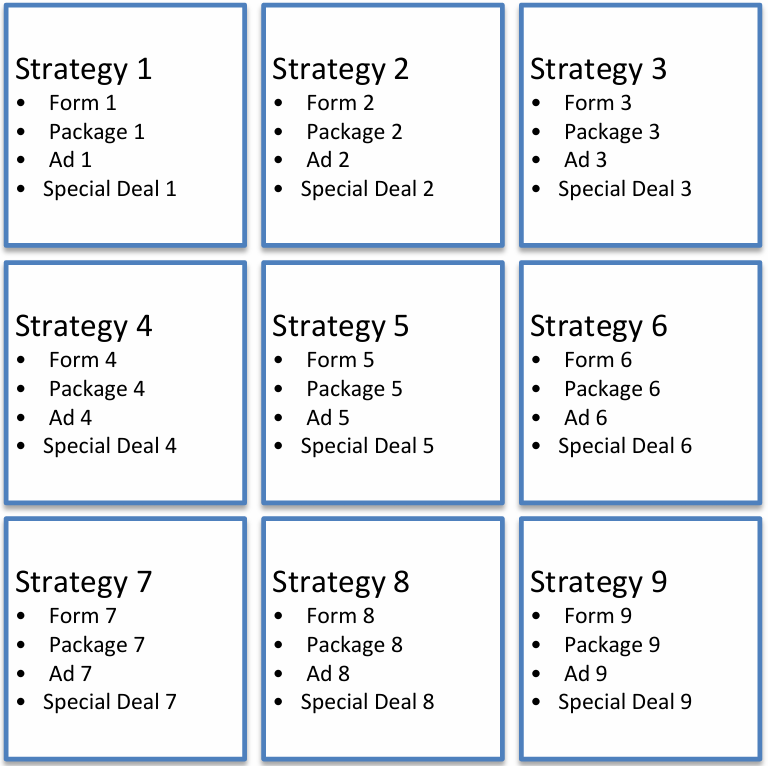

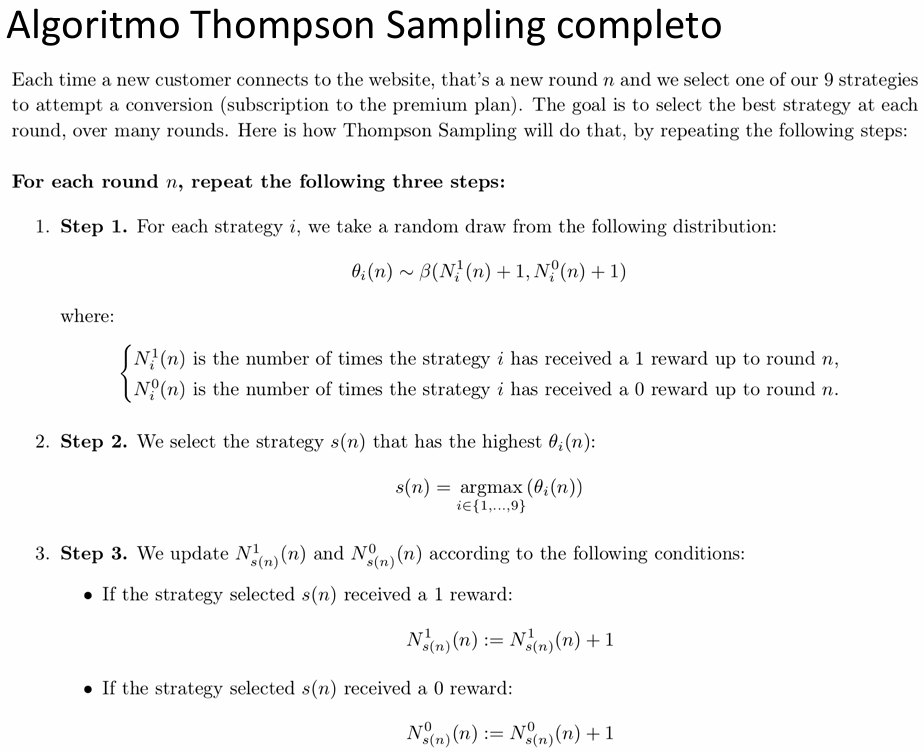

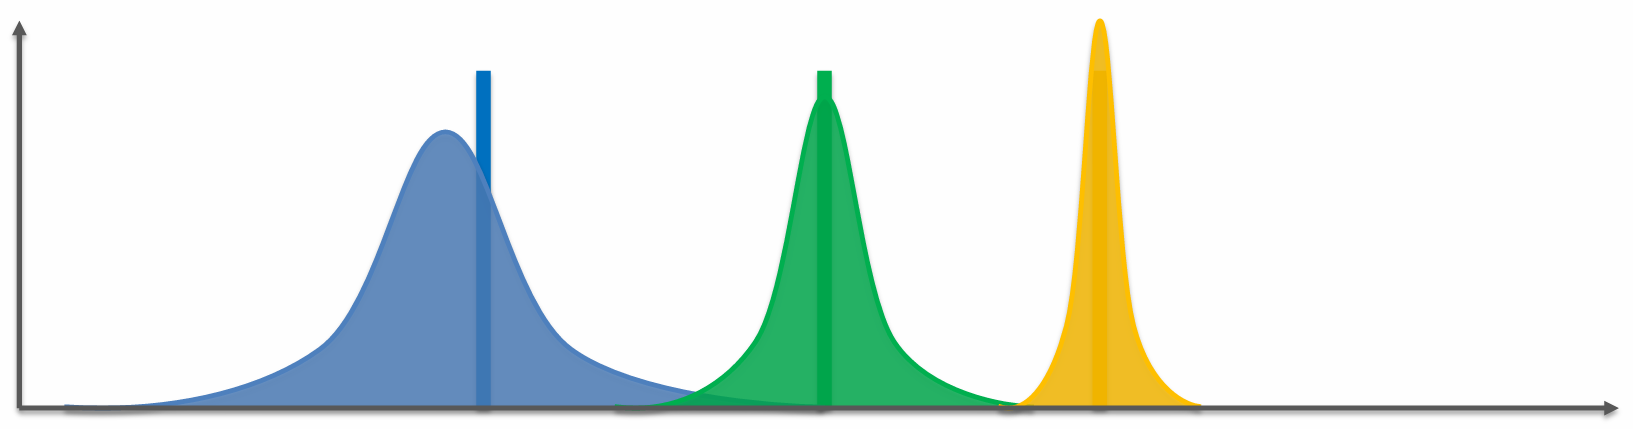

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# rounds
N = 10_000
# strategies
d = 9

In [3]:
# Criação da simulação
convertion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.20, 0.08, 0.01]
X = np.array(np.zeros((N, d)))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= convertion_rates[j]:
            X[i, j] = 1
X[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.]])

## Implementação da estratégia randômica e do Thompson Sampling

In [14]:
# rs = random strategy
strategies_selected_rs = []
# ts = thompson sampling
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
# bs = best strategy
total_reward_bs = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
rewards_strategies = [0] * d
# usado para calcular a curva de arrependimento
regret = []

In [15]:
for n in range(N):
    # Estratégia randômica
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs += reward_rs

    # Estratégia Thompson sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] += 1
    else:
        numbers_of_rewards_0[strategy_ts] += 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts += reward_ts

    # Best Strategy usado para o Regret Curve
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
        total_reward_bs = max(rewards_strategies)

    # Regret
    regret.append(total_reward_bs - total_reward_ts)

## Cálculo do retorno absoluto e retorno relativo

In [16]:
absolute_return = (total_reward_ts - total_reward_rs) * 19.99
relative_return = (total_reward_ts - total_reward_rs) /  total_reward_rs * 100
print("Absolute return: {:.0f} R$".format(absolute_return))
print("Relative return: {:.0f} %".format(relative_return))

Absolute return: 18731 R$
Relative return: 99 %


## Gráfico com o histograma das seleções

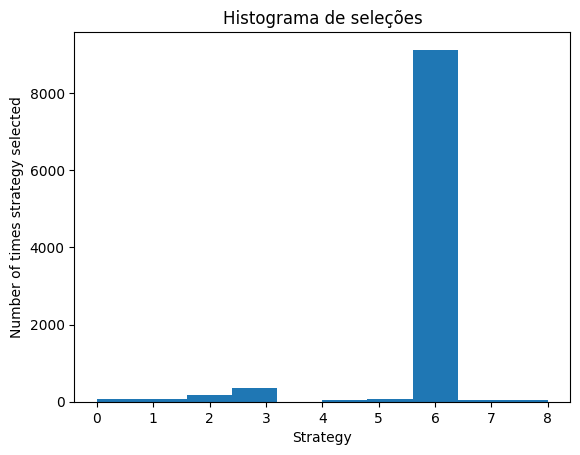

In [17]:
plt.hist(strategies_selected_ts)
plt.title("Histograma de seleções")
plt.xlabel("Strategy")
plt.ylabel("Number of times strategy selected")
plt.show()

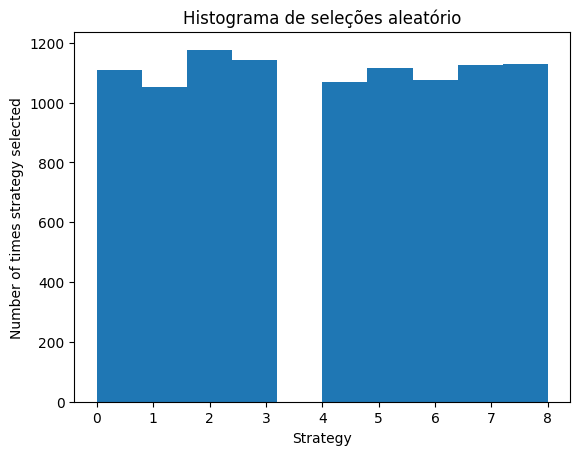

In [18]:
plt.hist(strategies_selected_rs)
plt.title("Histograma de seleções aleatório")
plt.xlabel("Strategy")
plt.ylabel("Number of times strategy selected")
plt.show()

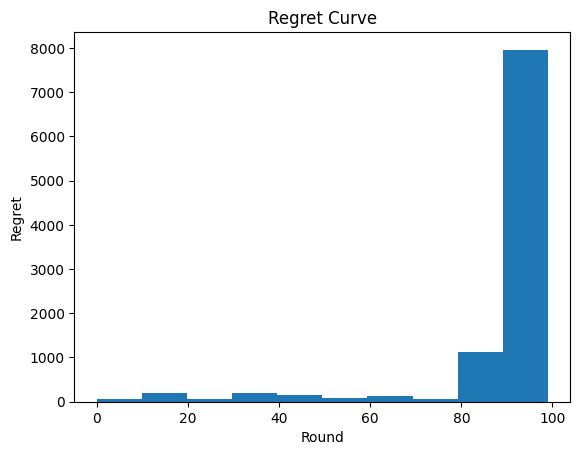

In [19]:
plt.hist(regret)
plt.title("Regret Curve")
plt.xlabel("Round")
plt.ylabel("Regret")
plt.show()